In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


In [2]:
def histogram():
    width = 1/1.5
    xls = pd.ExcelFile('taapl.xlsx')
    tweets = pd.read_excel(xls, 'Stream')
    tweets['PUBLICATION_DATE'] =''
    for index, row in tweets.T.iteritems():
        day=datetime.strptime(tweets.at[index, 'Date'], '%Y-%m-%d')
        time  = datetime.strptime(tweets.at[index, 'Hour'], '%H:%M')
        temp=day+timedelta(hours=time.hour,minutes=time.minute,seconds=time.second)
        tweets.at[index,'PUBLICATION_DATE'] =temp
        
    timeSpan = pd.read_csv("indexesTAAPL.csv")
    timeSpan.rename(columns={'Unnamed: 0':'date'}, inplace= True)
    timeSpan = timeSpan['date'].tolist()
    timeSpan = [datetime.strptime(row, '%Y-%m-%d %H:%M:%S') for row in timeSpan]
    initDate = max(timeSpan[0], tweets['PUBLICATION_DATE'][len(tweets)-1])
    finalDate = min(timeSpan[len(timeSpan)-1], tweets['PUBLICATION_DATE'][0])
    i = len(tweets)-1;
    j = 0


    # ALLINEAMENTO INIZIO
    while(timeSpan[j] < initDate):
        j+=1
    while(tweets['PUBLICATION_DATE'][i] <= initDate):
        i-=1
    
    count = list()
    while( tweets['PUBLICATION_DATE'][i] < finalDate and timeSpan[j] < finalDate ):
        c = 0
        while(i>0 and timeSpan[j] > tweets['PUBLICATION_DATE'][i]):
            c +=1
            i-=1
        if(c == 0):
            print(timeSpan[j])
        count.append(c)
        j+=1
    hist = {i:count.count(i) for i in count}  
    x = list()
    height = list()
    tot=0
    for key in hist.keys():
        x.append(key)
        tot+=1
        height.append(hist[key])
    
    plt.bar(x, height, width, color="blue")
    plt.title('Tweets n: '+str(len(tweets.index)))
    fig = plt.gcf()
    fig.savefig('tweetsHourlyFrequency/tweets.png', dpi=200)
    #plot_url = py.plot_mpl(fig, filename='mpl-basic-bar')
    return x, height
    

2016-05-06 02:00:00
2016-05-06 03:00:00
2016-05-06 04:00:00
2016-05-19 01:00:00
2016-06-07 23:00:00
2016-06-08 00:00:00
2016-06-08 01:00:00
2016-06-08 02:00:00
2016-06-08 03:00:00
2016-06-08 04:00:00
2016-06-08 22:00:00
2016-06-08 23:00:00
2016-06-09 00:00:00
2016-06-09 01:00:00
2016-06-09 02:00:00
2016-06-09 03:00:00
2016-06-09 04:00:00
2016-06-09 22:00:00
2016-06-09 23:00:00
2016-06-10 00:00:00
2016-06-10 01:00:00
2016-06-10 02:00:00
2016-06-10 03:00:00
2016-06-10 04:00:00
2016-06-10 22:00:00
2016-06-10 23:00:00
2016-06-11 00:00:00
2016-06-11 01:00:00
2016-06-11 02:00:00
2016-06-11 03:00:00
2016-06-11 04:00:00
2016-06-13 22:00:00
2016-06-13 23:00:00
2016-06-14 00:00:00
2016-06-14 01:00:00
2016-06-14 02:00:00
2016-06-14 03:00:00
2016-06-14 04:00:00


([3695,
  89,
  55,
  59,
  43,
  24,
  21,
  1031,
  53,
  33,
  31,
  28,
  17,
  1189,
  50,
  42,
  47,
  29,
  34,
  1724,
  67,
  72,
  44,
  45,
  18,
  1654,
  83,
  66,
  39,
  3407,
  104,
  93,
  79,
  58,
  73,
  69,
  1425,
  63,
  54,
  1460,
  52,
  1336,
  68,
  56,
  38,
  2355,
  75,
  62,
  40,
  57,
  5041,
  154,
  107,
  91,
  117,
  2546,
  51,
  60,
  1776,
  106,
  116,
  46,
  1864,
  150,
  87,
  1636,
  48,
  23,
  5090,
  109,
  111,
  98,
  113,
  8617,
  993,
  649,
  452,
  409,
  351,
  428,
  7859,
  163,
  189,
  135,
  99,
  4270,
  144,
  167,
  145,
  133,
  100,
  108,
  2734,
  112,
  85,
  7427,
  250,
  147,
  157,
  101,
  3484,
  155,
  140,
  92,
  65,
  2691,
  2302,
  0,
  4071,
  41,
  8015,
  70,
  2262,
  77,
  35,
  2454,
  141,
  64,
  49,
  4252,
  134,
  96,
  94,
  233,
  169,
  2836,
  82,
  7386,
  86,
  4458,
  88,
  2270,
  26,
  36,
  1035,
  2087,
  78,
  32,
  3925,
  159,
  37,
  2828,
  74,
  121,
  81,
  2825,
  115,
  17

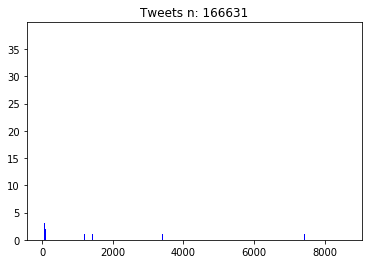

In [3]:
histogram()